# Bitcoin History Data

Import Libarys.
Read csv.
Take a first look at our data

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.offline
import plotly.graph_objs as go
import plotly.plotly as py
import seaborn as sns

In [52]:
df = pd.read_csv("Bitcoin_dataset_updated.csv")

In [7]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD]
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3
1,2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3
2,2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3
3,2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3
4,2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3


## Plots

Make some plots with the data for a further look

In [8]:
date = df["Date"]
bitPrice = df["BTC price [USD]"]
goldPrice = df["Gold price[USD]"]
oilPrice = df["Oil WTI price[USD]"]
sp500 = df["SP500 close index"]
transac = df["n-transactions"]

In [79]:
bitPrice.iplot(kind='bar',title = 'BTC')

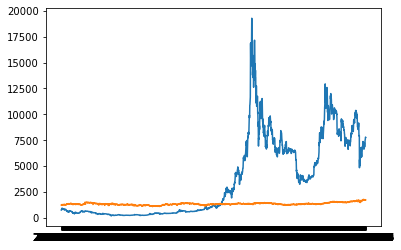

In [5]:
plt.plot(date, bitPrice)
plt.plot(date, goldPrice)
# plt.plot(date, oilPrice)
# plt.plot(date, sp500)

plt.show()

In [22]:
print(df)

            Date  BTC price [USD]  n-transactions  fee [USD]  \
0     2014-01-02           749.27         54770.0       0.18   
1     2014-01-03           781.23         60980.0        NaN   
2     2014-01-04           807.39         52052.0        NaN   
3     2014-01-05           828.74         58662.0       0.38   
4     2014-01-06           904.98         67358.0        NaN   
...          ...              ...             ...        ...   
2305  2020-04-25          7507.08        280805.0       0.75   
2306  2020-04-26          7549.52        252833.0       0.62   
2307  2020-04-27          7699.27        311217.0       0.69   
2308  2020-04-28          7790.66        323475.0       0.66   
2309  2020-04-29          7765.33        331401.0       1.30   

      btc search trends  Gold price[USD]  SP500 close index  \
0                     8           1225.0            1831.98   
1                     8           1238.4            1831.37   
2                     8              NaN  

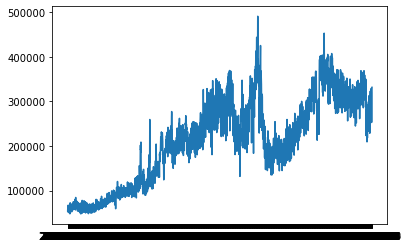

In [30]:
plt.plot(date, transac)
plt.show()

assume that the data at 2017 may be interesting for us. So we filter them and make plots again
Save the data at begin of 2017 to end in variable for some easy code lines

In [62]:
df.head()
df.dtypes

Date                                      datetime64[ns]
BTC price [USD]                                  float64
n-transactions                                   float64
fee [USD]                                        float64
btc search trends                                  int64
Gold price[USD]                                  float64
SP500 close index                                float64
Oil WTI price[USD]                               float64
M2(Not seasonally adjusted)[1e+09 USD]           float64
dtype: object

In [58]:
df["Date"] = pd.to_datetime(df["Date"])
dataAt2017 = df["Date"].dt.year >= 2017

dateAt2017 = df.loc[dataAt2017, "Date"]
bitPriceAt17 = df.loc[dataAt2017, "BTC price [USD]"]
goldPriceAt17 = df.loc[dataAt2017, "Gold price[USD]"]
oilPriceAt17 = df.loc[dataAt2017, "Oil WTI price[USD]"]
sp500PriceAt17 = df.loc[dataAt2017, "SP500 close index"]

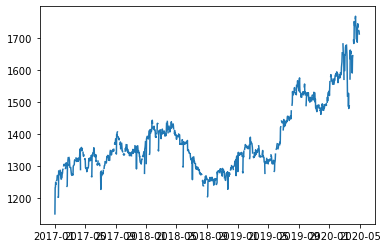

In [18]:
plt.plot(dateAt2017, goldPriceAt17)
# plt.plot(dateAt2017, bitPriceAt17)
# plt.plot(dateAt2017, oilPriceAt17)
# plt.plot(dateAt2017, sp500PriceAt17)
plt.show()

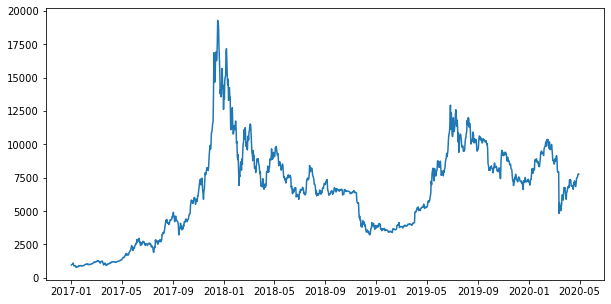

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(dateAt2017, bitPriceAt17)

plt.show()

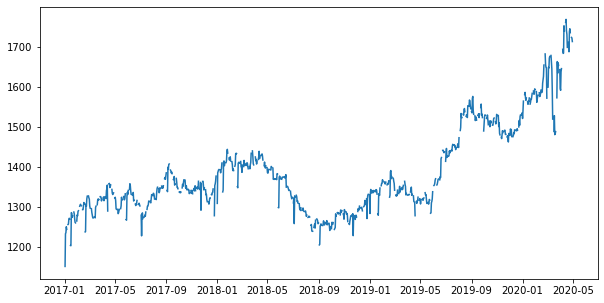

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(dateAt2017, goldPriceAt17)
plt.show()

In [57]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD],DateYear
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3,2014
1,2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3,2014
2,2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3,2014
3,2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3,2014
4,2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3,2014


## Aggregat Functions and try to look at the data by year

In [56]:
df["Date"] = pd.to_datetime(df["Date"])
df["DateYear"] = df["Date"].dt.year

btcAgg = df.groupby(by=["DateYear"]).agg(
    maxPrice=("BTC price [USD]", np.max),
    minPrice=("BTC price [USD]", np.min),
    meanPrice=("BTC price [USD]", np.mean)
)
print(btcAgg)

          maxPrice  minPrice    meanPrice
DateYear                                 
2014        915.69    311.00   525.864698
2015        463.98    172.00   272.048384
2016        975.89    363.75   565.231721
2017      19279.90    780.92  3936.087534
2018      17155.95   3231.91  7567.843562
2019      12932.55   3394.76  7363.272384
2020      10368.53   4830.21  7988.175083


In [43]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD],DateYear
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3,2014
1,2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3,2014
2,2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3,2014
3,2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3,2014
4,2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3,2014


In [45]:
type(df["BTC price [USD]"])

pandas.core.series.Series

In [20]:
btcPriceUSD = df["BTC price [USD]"]
btcWeek1 = btcWeek.drop(range(7)).reset_index(drop=True).sort_index()
btcLastWeek = btcWeek.drop(range(2303, 2310)).reset_index(drop=True).sort_index()

#btcWeek1 > btcLastWeek

btcWeek1.corr(btcLastWeek)


NameError: name 'btcWeek' is not defined

In [38]:
iweekPriceBTC = []
for i in btcPriceUSD:
    iweekPriceBTC.append[i+range(1,7)]
    i += 7
    

NameError: name 'numeric' is not defined

In [100]:
df.head()

,Date,BTC price [USD],n-transactions,fee [USD],btc search trends,Gold price[USD],SP500 close index,Oil WTI price[USD],M2(Not seasonally adjusted)[1e+09 USD],DateYear,Week
0,2014-01-02,749.27,54770.0,0.18,8,1225.0,1831.98,95.14,11089.3,2014,749.27
1,2014-01-03,781.23,60980.0,NaN,8,1238.4,1831.37,93.66,11089.3,2014,781.23
2,2014-01-04,807.39,52052.0,NaN,8,NaN,NaN,NaN,11089.3,2014,807.39
3,2014-01-05,828.74,58662.0,0.38,8,NaN,NaN,NaN,11089.3,2014,828.74
4,2014-01-06,904.98,67358.0,NaN,8,1237.8,1826.77,93.12,11089.3,2014,904.98


In [88]:
list(range(7))

[0, 1, 2, 3, 4, 5, 6]

In [87]:
list(range(2303, 2309))

[2303, 2304, 2305, 2306, 2307, 2308]

In [101]:
df["BTC price [USD]"].corr(df["Gold price[USD]"])

0.5605846695559041

In [22]:
df["BTC price [USD]"].corr(df["SP500 close index"])

0.8545663089028595

In [31]:
from scipy.stats import pearsonr

#clearBtcPrice = df.dropna(subset=["BTC price [USD]"])
#clearGoldPrice = df.dropna(subset=["Gold price[USD]"])
#clearSp500price = df.dropna(subset=["SP500 close index"])

#len(clearSp500price)
#len(clearBtcPrice)
#len(clearGoldPrice)

In [114]:
pearsonr(btcWeek1, btcLastWeek)

(0.983052994182128, 0.0)

In [26]:
pearsonr(df["BTC price [USD]"], (df["SP500 close index"]))

ValueError: array must not contain infs or NaNs

In [59]:
df.DateYear.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [63]:
for i in df.DateYear:
    #print(i)
    if i == "2014":
        df.DateYear = 0
    elif i == "2015":
        df.DateYear = 1
    elif i == "2016":
        df.DateYear = 2
    elif i == "2017":
        df.DateYear = 3
    elif i == "2018":
        df.DateYear = 4
    elif i == "2019":
        df.DateYear = 5
    elif i == "2020":
        df.DateYear = 6
    print(i)

2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014
2014


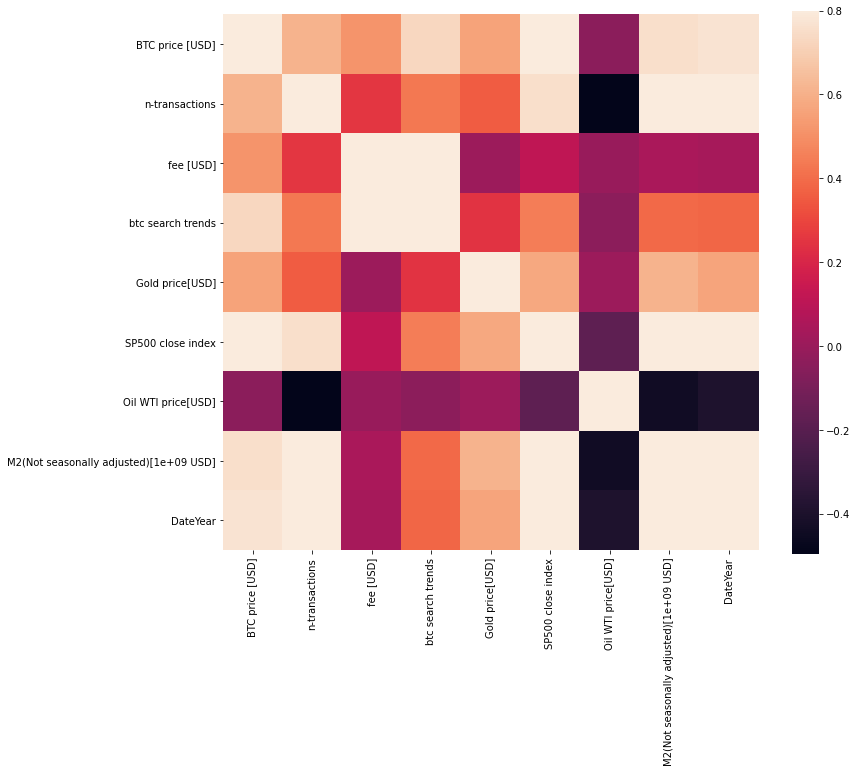

In [64]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True);
plt.show()